In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

In [25]:
# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_body.pkl', 'rb') as f:
    df_body = pickle.load(f)


In [4]:
# 파일 불러오기
with open('../../data/df_user.pkl', 'rb') as f:
    df_user = pickle.load(f)



In [5]:
df_body['date'] = df_body['creationdate'].dt.date
df_body['year'] = df_body['creationdate'].dt.year
df_body['month'] = df_body['creationdate'].dt.month
df_body['day'] = df_body['creationdate'].dt.day

In [32]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [74]:
df_body.groupby(['posttypeid']).count()[['id']]

,id
posttypeid,
1,18402542
2,24949500
4,32506
5,32505
6,182
7,1


In [75]:
df_body['body_len'] = df_body['body'].apply(lambda x : len(x))

* 질문의 길이   
*** 일자별 타입별 길이

id  answered_yn     body_len
year month day posttypeid                                        
2013 11    1   1           1.972813e+07     0.920378  1450.568222
               2           1.972810e+07     0.000000   750.325224
               4           1.972889e+07     0.000000   117.181818
               5           1.972888e+07     0.000000   483.136364
           2   1           1.974295e+07     0.924562  1485.227520
...                                 ...          ...          ...
2023 11    29  5           7.757191e+07     0.000000    44.000000
           30  1           7.757877e+07     0.377386  2048.297571
               2           7.757872e+07     0.000000  1194.023677
               4           7.758004e+07     0.000000    95.250000
               5           7.758004e+07     0.000000   348.250000

[14639 rows x 3 columns]

In [77]:
# Q&A 만 추출 
df_body = df_body[df_body['posttypeid'].isin(['1','2'])]

In [82]:
df_bodycnt = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [86]:
df_bodycnt = pd.pivot_table(df_bodycnt, index = 'date', columns = 'posttypeid', values = 'id').reset_index()

In [89]:
df_bodycnt['q_over_a'] = df_bodycnt['2'].div(df_bodycnt['1'])

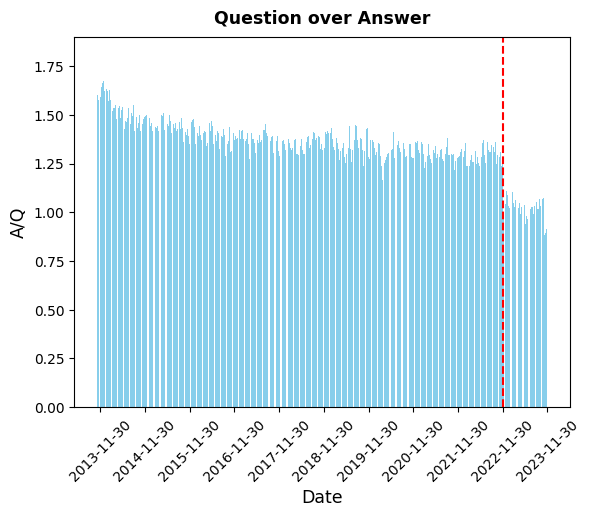

In [94]:
fig, ax = plt.subplots()


ax.bar(df_bodycnt.date
    ,  height = df_bodycnt['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question over Answer", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [101]:
df_bodyanswerdyn = df_body[df_body['posttypeid'] =='1'].groupby(['date', 'answered_yn']).count()[['id']].reset_index()

In [103]:
df_bodyanswerdyn = pd.pivot_table(df_bodyanswerdyn, index = 'date', columns = 'answered_yn', values = 'id').reset_index()

In [107]:
df_bodyanswerdyn['rate'] = df_bodyanswerdyn[1] / (df_bodyanswerdyn[1] + df_bodyanswerdyn[0])

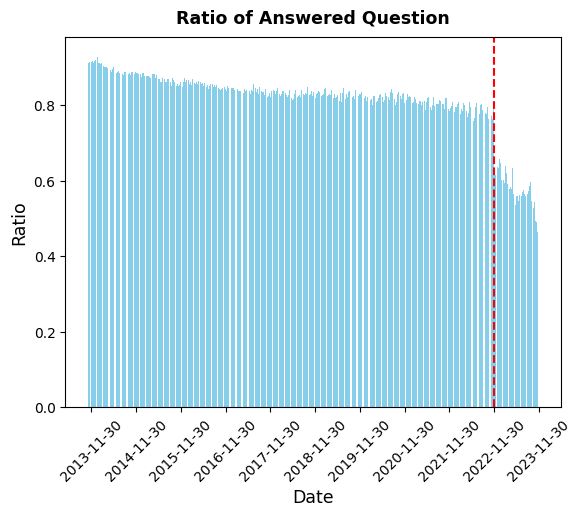

In [109]:
fig, ax = plt.subplots()


ax.bar(df_bodyanswerdyn.date
    ,  height = df_bodyanswerdyn['rate']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

질문과 첫번째 답 사이 gap 에 대한 time distribution

In [33]:
df_da['qna_diff'] = df_da['a_creationdate'] - df_da['q_creationdate']

In [34]:
# tf = datetime.date(2021,11,1)
# df_da_df = df_da[df_da['q_creationdate'].dt.date >= tf]

In [35]:
df_da_df = df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [50]:
df_da_df['qna_diff_int'] = df_da_df['qna_diff']/ pd.Timedelta(minutes=1)

In [64]:
df_da_df[['qna_diff', 'qna_diff_int', 'date']]

,qna_diff,qna_diff_int,date
4773871,0 days 00:27:55.227000,27.920450,2013-11-01
14555946,0 days 00:01:21.357000,1.355950,2013-11-01
21165579,0 days 00:08:15.753000,8.262550,2013-11-01
14555949,0 days 00:05:28.213000,5.470217,2013-11-01
2123150,0 days 01:10:06.263000,70.104383,2013-11-01
...,...,...,...
22889919,0 days 00:12:22.637000,12.377283,2023-11-30
20771525,0 days 00:15:07.043000,15.117383,2023-11-30
14092975,0 days 00:03:40.630000,3.677167,2023-11-30
941025,0 days 04:54:11.874000,294.197900,2023-11-30


In [65]:
df_da_df_dff        = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_df_dff_min    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_df_dff_max    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_df_dff_median = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [63]:
df_da_df_dff.head()

,year,month,day,qna_diff_int
0,2013,11,1,30290.791568
1,2013,11,2,28129.797441
2,2013,11,3,37157.496537
3,2013,11,4,33486.547305
4,2013,11,5,31900.980285


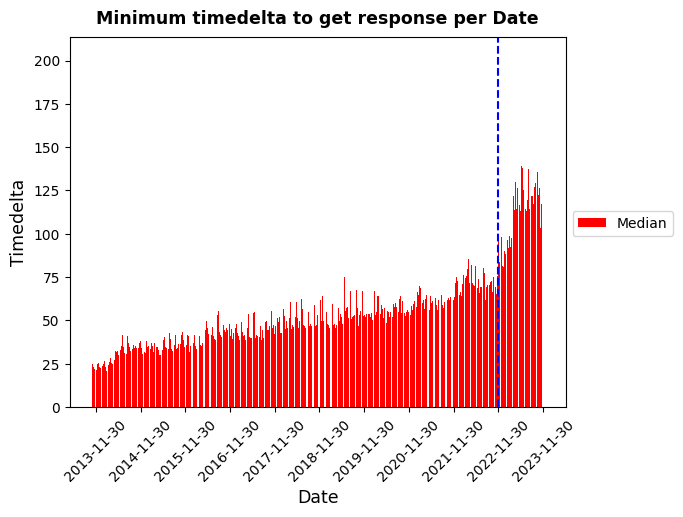

In [79]:
fig, ax = plt.subplots()

# ax.bar(df_da_df_dff.date
#     ,  height = df_da_df_dff['qna_diff_int']
#     ,  color = 'skyblue'
#     ,  label = 'Mean'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_da_df_dff_median.date
    ,  height = df_da_df_dff_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

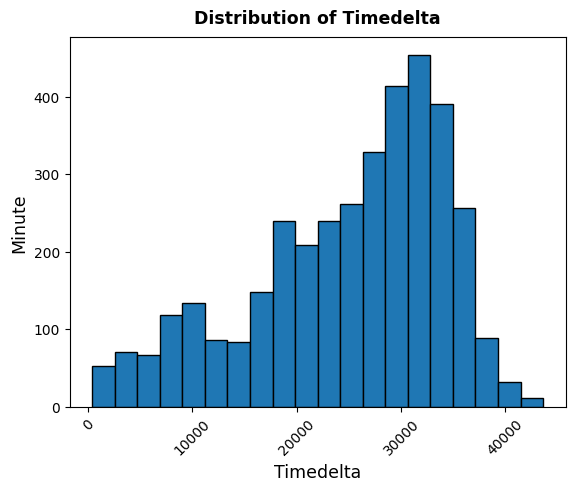

In [77]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.hist(df_da_df_dff['qna_diff_int'], # specify data
        bins = 20, # number of bins

        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Distribution of Timedelta", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Timedelta", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Minute", # add y-axis label
              fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# ax.axvline(['2022-11-30'], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()
df_date_per_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['body_len']).reset_index()
df_date_per_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len']).reset_index()
df_date_per_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['body_len']).reset_index()

In [ ]:
df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len'])

In [ ]:
df_date_per_len_q = df_date_per_len[df_date_per_len['posttypeid'] =='1']
df_date_per_len_q = df_date_per_len_q.set_index('date')
df_date_per_len_a = df_date_per_len[df_date_per_len['posttypeid'] =='2']
df_date_per_len_a = df_date_per_len_a.set_index('date')

In [ ]:
df_date_per_len_min_q = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='1']
df_date_per_len_min_q = df_date_per_len_min_q.set_index('date')
df_date_per_len_min_a = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='2']
df_date_per_len_min_a = df_date_per_len_min_a.set_index('date')

In [ ]:
df_date_per_len_max_q = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='1']
df_date_per_len_max_q = df_date_per_len_max_q.set_index('date')
df_date_per_len_max_a = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='2']
df_date_per_len_max_a = df_date_per_len_max_a.set_index('date')

In [ ]:
df_date_per_len_median_q = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='1']
df_date_per_len_median_q = df_date_per_len_median_q.set_index('date')
df_date_per_len_median_a = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='2']
df_date_per_len_median_a = df_date_per_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_date_per_len_q.index
    ,  height = df_date_per_len_q['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_q.index
    ,  height = df_date_per_len_median_q['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type


# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2023-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len_diff = (df_date_per_len_max_q['body_len'] - df_date_per_len_min_q['body_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_date_per_len_diff.index
    ,  height = df_date_per_len_diff['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2023-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_a.index
    ,  height = df_date_per_len_a['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_a.index
    ,  height = df_date_per_len_median_a['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_len_rate = df_date_per_len_a['body_len'].div( df_date_per_len_q['body_len']).to_frame()

In [ ]:
df_date_per_len_rate.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_rate.index
    ,  height = df_date_per_len_rate['body_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer Length over Question Length per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A Len/Q Len", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();


소스코드 전처리 

In [ ]:
def cleanhtml(raw_html):
  # 1.Source code in python language is hard to understand, so replace all the <code> tag first
  cleantext_1 = re.findall(r'(?<=\<code>)(.*?)(?=<\/code>)', raw_html.replace('\n', '_**_'))
  cleantext_1 = [x.replace('_**_', '\n') for x in cleantext_1]
  # 2. replace html tags
  # <p>
  tag_re = re.compile('<.*?>')
  cleantext_2 = [re.sub(tag_re, '', x) for x in cleantext_1]
  return cleantext_2

In [ ]:
# apply the function, cleanhtml to the question and body text
df_body.loc[:, 'prep_body'] = df_body['body'].apply(cleanhtml)

In [ ]:
# # 전체 데이터셋 
# with open('../../data/df_body.pkl', 'wb') as f:
#     pickle.dump(df_body, f)

In [ ]:
df_body['concat_prep_body'] = df_body['prep_body'].apply(lambda x : ''.join(x))

In [ ]:
df_body['src_len'] = df_body['concat_prep_body'].apply(lambda x:len(x))

In [ ]:
len(df_body['id'].unique())
# 43352042

In [ ]:
df_body['src_len'].div(df_body['body_len'])

In [ ]:
df_date_per_src_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['src_len']).reset_index()
df_date_per_src_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['src_len']).reset_index()
df_date_per_src_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['src_len']).reset_index()
df_date_per_src_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['src_len']).reset_index()

In [ ]:
df_date_per_src_len_q = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='1']
df_date_per_src_len_q = df_date_per_src_len_q.set_index('date')
df_date_per_src_len_a = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='2']
df_date_per_src_len_a = df_date_per_src_len_a.set_index('date')

In [ ]:
df_date_per_src_len_median_q = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='1']
df_date_per_src_len_median_q = df_date_per_src_len_median_q.set_index('date')
df_date_per_src_len_median_a = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='2']
df_date_per_src_len_median_a = df_date_per_src_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_q.index
    ,  height = df_date_per_src_len_q['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_src_len_median_q.index
    ,  height = df_date_per_src_len_median_q['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of SRC in Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2023-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))


plt.xticks(rotation=45)
plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_a.index
    ,  height = df_date_per_src_len_a['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_src_len_median_a.index
    ,  height = df_date_per_src_len_median_a['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length  of SRC in Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2023-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate = df_date_per_src_len_a['src_len'].div( df_date_per_src_len_q['src_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_date_per_src_len_rate['src_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate

In [ ]:
df_q_a = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==1)]
df_q = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==0)]
# df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()

In [ ]:
# df_date_per_src_len = 
df_q_a_m = df_q_a.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_m = df_q.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()

In [ ]:
df_q_a_m

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
yticks = np.arange(200, 2000, 400)
axs[0].bar(df_q_a_m['date']
        ,  df_q_a_m['src_len']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs[0].set_title('SRC length of Answered Questions ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Length', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].set_yticks(yticks)
# axs[0].axvline(major_xticks[-2], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_q_m['date']
        ,  df_q_m['src_len']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].set_title('SRC length of not Answered Questions ', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Length', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline(major_xticks[-2], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)


ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

제목 길이의 변화

df_body

In [ ]:
df_body_q = df_body[df_body['posttypeid'] =='1']

In [ ]:
df_body_q['title_len'] = df_body_q['title'].apply(lambda x : len(x))

In [ ]:
df_date_per_t_len         = df_body_q.groupby(['date','year', 'month', 'day']).mean(['title_len']).reset_index()
df_date_per_len_t_min     = df_body_q.groupby(['date','year', 'month', 'day']).min(['title_len']).reset_index()
df_date_per_len_t_max     = df_body_q.groupby(['date','year', 'month', 'day']).max(['title_len']).reset_index()
df_date_per_len_t_median  = df_body_q.groupby(['date','year', 'month', 'day']).median(['title_len']).reset_index()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_t_len.date
    ,  height = df_date_per_t_len['title_len']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_len_t_median.date
    ,  height = df_date_per_len_t_median['title_len']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.set_title("Length of Title per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [3]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [4]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [5]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [6]:
df_da_q['year'].min()

2013

In [7]:
df_da_q_per_len         = df_da_q.groupby(['date','year', 'month', 'day']).mean(['q_tagslen']).reset_index()
df_da_q_per_len_min     = df_da_q.groupby(['date','year', 'month', 'day']).min(['q_tagslen']).reset_index()
df_da_q_per_len_max     = df_da_q.groupby(['date','year', 'month', 'day']).max(['q_tagslen']).reset_index()
df_da_q_per_len_median  = df_da_q.groupby(['date','year', 'month', 'day']).median(['q_tagslen']).reset_index()


In [8]:
df_da_q_per_len

,date,year,month,day,q_id,q_tagslen
0,2013-11-01,2013,11,1,1.972806e+07,2.990741
1,2013-11-02,2013,11,2,1.974292e+07,2.947686
2,2013-11-03,2013,11,3,1.975407e+07,2.977130
3,2013-11-04,2013,11,4,1.976974e+07,2.978964
4,2013-11-05,2013,11,5,1.979053e+07,2.977150
...,...,...,...,...,...,...
3677,2023-11-26,2023,11,26,7.755191e+07,3.031455
3678,2023-11-27,2023,11,27,7.755734e+07,2.996209
3679,2023-11-28,2023,11,28,7.756431e+07,3.021692
3680,2023-11-29,2023,11,29,7.757156e+07,3.031519


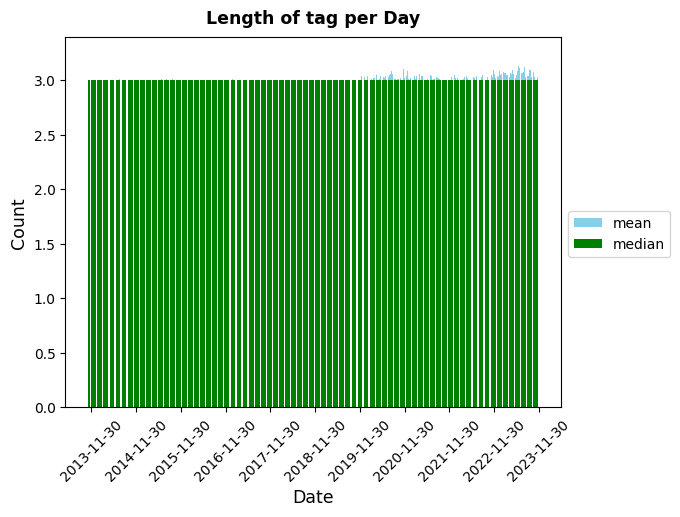

In [13]:
fig, ax = plt.subplots()

ax.bar(df_da_q_per_len.date
    ,  height = df_da_q_per_len['q_tagslen']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type



ax.bar(df_da_q_per_len_median.date
    ,  height = df_da_q_per_len_median['q_tagslen']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of tag per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [12]:
df_da_q_per_len_median

,date,year,month,day,q_id,q_tagslen
0,2013-11-01,2013,11,1,19728141.5,3.0
1,2013-11-02,2013,11,2,19742923.5,3.0
2,2013-11-03,2013,11,3,19754099.0,3.0
3,2013-11-04,2013,11,4,19769855.5,3.0
4,2013-11-05,2013,11,5,19790601.5,3.0
...,...,...,...,...,...,...
3677,2023-11-26,2023,11,26,77551903.0,3.0
3678,2023-11-27,2023,11,27,77557424.0,3.0
3679,2023-11-28,2023,11,28,77564362.0,3.0
3680,2023-11-29,2023,11,29,77571578.5,3.0


In [3]:
df_user['year'] = df_user['creationdate'].dt.year
df_user['month'] = df_user['creationdate'].dt.month
df_user['day'] = df_user['creationdate'].dt.day
df_user['date'] = df_user['creationdate'].dt.date


In [4]:
df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

,date,year,month,day,id
0,2008-07-31,2008,7,31,9
1,2008-08-01,2008,8,1,80
2,2008-08-02,2008,8,2,54
3,2008-08-03,2008,8,3,54
4,2008-08-04,2008,8,4,81
...,...,...,...,...,...
5599,2023-11-29,2023,11,29,7152
5600,2023-11-30,2023,11,30,7017
5601,2023-12-01,2023,12,1,6254
5602,2023-12-02,2023,12,2,5608


In [5]:
df_user_per_date         = df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [6]:
df_user_per_date

,date,year,month,day,id
0,2008-07-31,2008,7,31,9
1,2008-08-01,2008,8,1,80
2,2008-08-02,2008,8,2,54
3,2008-08-03,2008,8,3,54
4,2008-08-04,2008,8,4,81
...,...,...,...,...,...
5599,2023-11-29,2023,11,29,7152
5600,2023-11-30,2023,11,30,7017
5601,2023-12-01,2023,12,1,6254
5602,2023-12-02,2023,12,2,5608


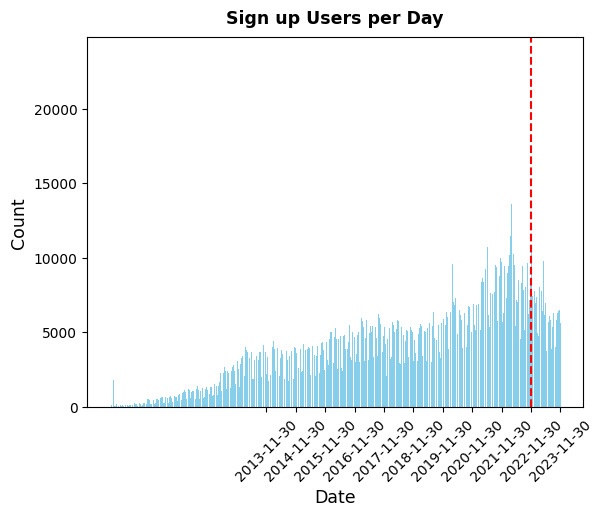

In [11]:
fig, ax = plt.subplots()

ax.bar(df_user_per_date.date
    ,  height = df_user_per_date['id']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Sign up Users per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [12]:
df_user

,id,creationdate,displayname,lastaccessdate,year,month,day,date
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023,12,3,2023-12-03
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023,12,3,2023-12-03
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023,12,3,2023-12-03
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023,12,3,2023-12-03
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023,12,3,2023-12-03
...,...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008,8,29,2008-08-29
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008,8,29,2008-08-29
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008,8,29,2008-08-29
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008,8,29,2008-08-29


In [17]:
df_da_q = df_da[['q_id', 'q_owneruserid']].drop_duplicates()
df_da_a = df_da[['a_id', 'a_owneruserid']].drop_duplicates()

In [20]:
df_da_q_cnt = df_da_q.groupby(['q_owneruserid']).count()[['q_id']]
df_da_a_cnt = df_da_a.groupby(['a_owneruserid']).count()[['a_id']]

In [28]:
df_user_qna = pd.merge(df_user, df_da_q_cnt, left_on = 'id', right_on = 'q_owneruserid', how= 'left')
df_user_qna = pd.merge(df_user_qna, df_da_a_cnt, left_on = 'id', right_on = 'a_owneruserid', how= 'left')

In [31]:
df_user_qna.fillna(0, inplace=True)

In [32]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,year,month,day,date,q_id,a_id
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023,12,3,2023-12-03,0.0,0.0
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023,12,3,2023-12-03,0.0,0.0
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023,12,3,2023-12-03,0.0,0.0
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023,12,3,2023-12-03,0.0,0.0
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023,12,3,2023-12-03,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008,8,29,2008-08-29,2.0,2.0
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008,8,29,2008-08-29,0.0,0.0
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008,8,29,2008-08-29,0.0,0.0
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008,8,29,2008-08-29,0.0,1.0


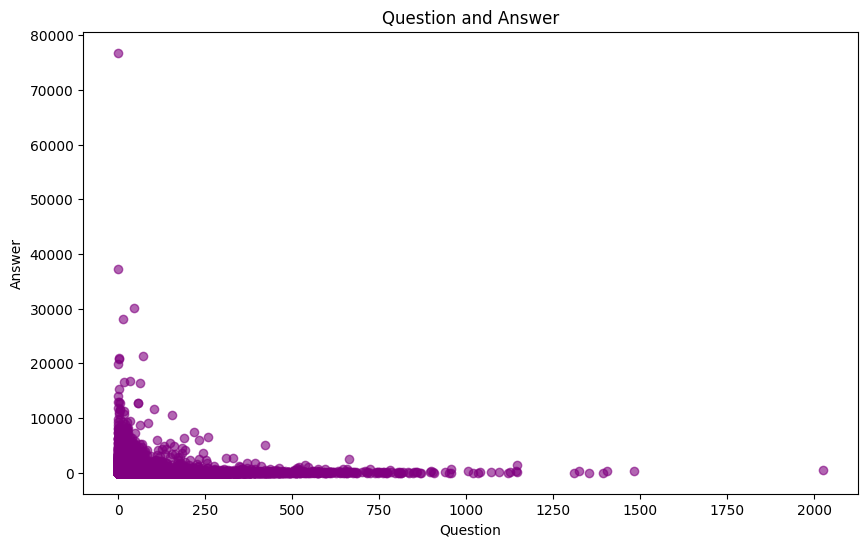

In [33]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_user_qna['q_id'], df_user_qna['a_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [66]:
df_user_qna['gpt_af_yn'] = np.where(df_user_qna['date'] >= datetime.date(2022,11,30), 1, 0)

In [67]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,year,month,day,date,q_id,a_id,gpt_af_yn
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023,12,3,2023-12-03,0.0,0.0,1
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023,12,3,2023-12-03,0.0,0.0,1
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023,12,3,2023-12-03,0.0,0.0,1
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023,12,3,2023-12-03,0.0,0.0,1
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023,12,3,2023-12-03,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008,8,29,2008-08-29,2.0,2.0,0
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008,8,29,2008-08-29,0.0,0.0,0
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008,8,29,2008-08-29,0.0,0.0,0
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008,8,29,2008-08-29,0.0,1.0,0


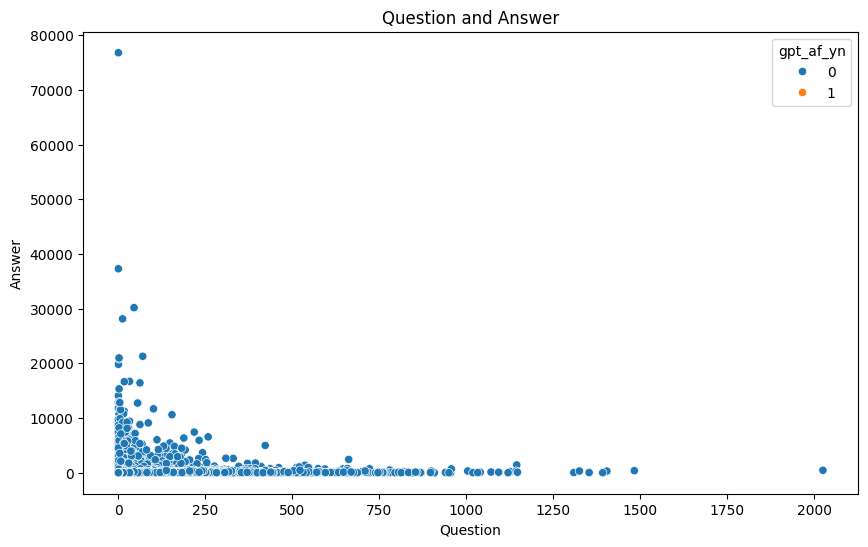

In [70]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

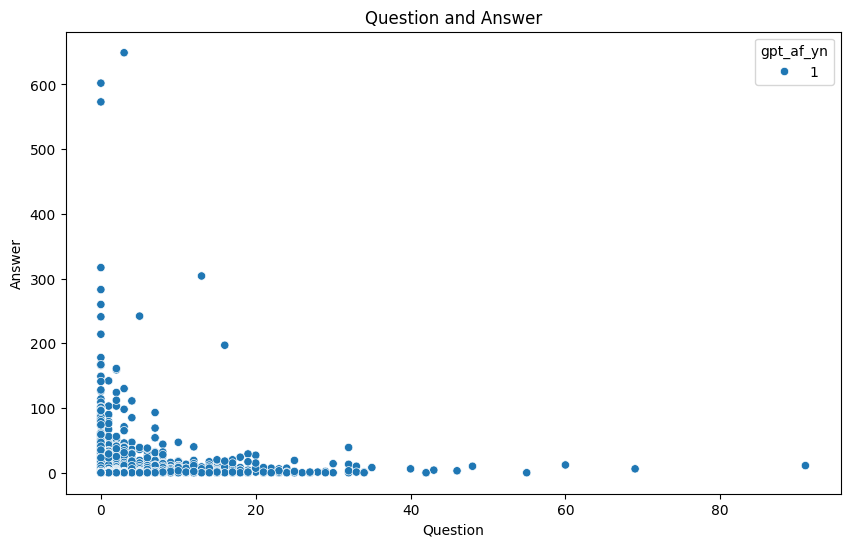

In [71]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna[df_user_qna['gpt_af_yn'] ==1] , x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [35]:
df_user_qna[df_user_qna['a_id']>70000]

,id,creationdate,displayname,lastaccessdate,year,month,day,date,q_id,a_id
20946986,1144035,2012-01-11 19:53:57.590,Gordon Linoff,2023-06-16 22:48:45.203,2012,1,11,2012-01-11,0.0,76778.0


아니 혼자 7만건은 좀 너무한거 아닙니까...ㅎㅎㅎㅎㅎ

In [52]:
df_q_1144035 = df_da.loc[df_da['a_owneruserid'] == 1144035, ['q_id', 'a_creationdate']]

In [53]:
df_q_1144035 = df_q_1144035[['q_id', 'a_creationdate']].drop_duplicates()

In [54]:
df_q_1144035['date'] = df_q_1144035['a_creationdate'].dt.date

In [55]:
df_q_1144035

,q_id,a_creationdate,date
651,69180966,2021-09-14 15:55:02.210,2021-09-14
759,68194599,2021-06-30 12:19:13.630,2021-06-30
764,68186990,2021-06-30 00:10:27.797,2021-06-30
861,67298550,2021-04-28 10:36:32.637,2021-04-28
957,66342173,2021-02-23 22:59:26.460,2021-02-23
...,...,...,...
23040571,37210123,2016-05-13 12:33:13.263,2016-05-13
23040630,29812032,2015-04-23 01:37:26.893,2015-04-23
23041368,30920740,2015-06-18 16:33:49.587,2015-06-18
23041448,30439758,2015-05-25 13:48:46.747,2015-05-25


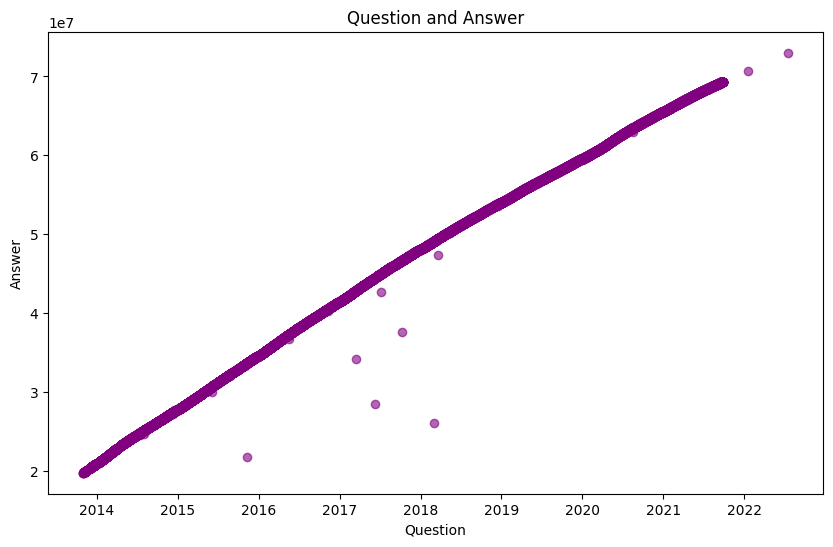

In [56]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_q_1144035['date'], df_q_1144035['q_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [57]:
df_q_1144035['date'].max()

datetime.date(2022, 7, 17)

In [58]:
df_q_1144035.groupby('date').count()[['q_id']].sort_values(by = ['date'])

,q_id
date,
2013-11-01,4
2013-11-02,1
2013-11-03,8
2013-11-04,11
2013-11-05,12
...,...
2021-09-23,34
2021-09-24,27
2021-09-25,16
